In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [285]:
#Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv
df = pd.read_csv("Datos-COVID19/output/producto16/CasosGeneroEtario.csv")

for label in df:
    if (label != 'Grupo de edad' and label != 'Sexo' and label != cols[len(cols)-1]):
        del df[label] 
df        

,Grupo de edad,Sexo,2020-05-08
0,00 - 04 años,M,277
1,05 - 09 años,M,194
2,10 - 14 años,M,247
3,15 - 19 años,M,370
4,20 - 24 años,M,1045
5,25 - 29 años,M,1747
6,30 - 34 años,M,1807
7,35 - 39 años,M,1506
8,40 - 44 años,M,1272
9,45 - 49 años,M,1177


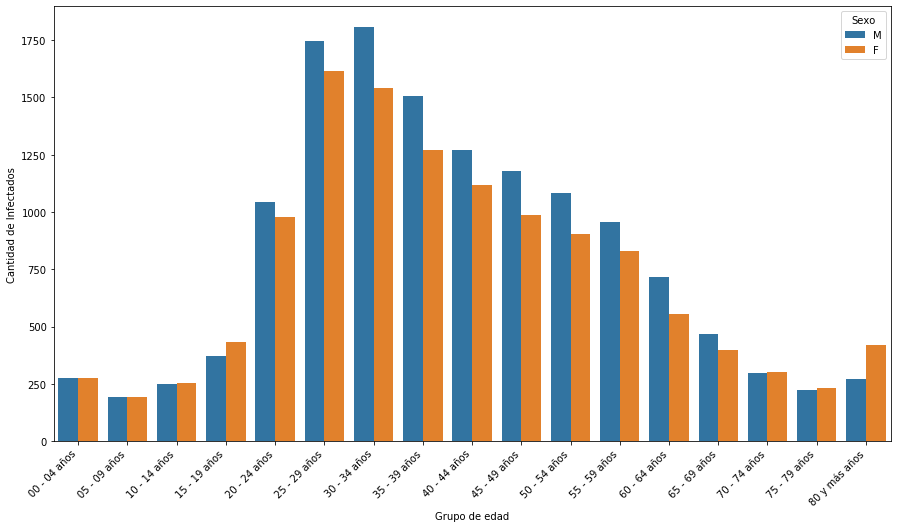

In [287]:
plt.figure(figsize=(15,8))
chart=sns.barplot(x='Grupo de edad', y='2020-05-08',hue='Sexo', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45 , horizontalalignment='right');
plt.ylabel('Cantidad de Infectados');


### El grupo etario más afectado han sido aquellos que tienen entre 25 a 39 años con una tasa de 44,6 por cada 100.000 habitantes.

### Preguna 2: Gráfico de Torta para la cantidad de casos confirmados de contagiados totales para las regiones (comunas) de Chile (Valparaíso).

In [7]:
##Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv
df = pd.read_csv("Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv",usecols=[0 , 1, 6])
df.columns = [c.replace(' ', '_') for c in df.columns]
df

,Region,Casos__totales__acumulados,%__Total
0,Arica y Parinacota,340,1.18%
1,Tarapaca,520,1.80%
2,Antofagasta,978,3.39%
3,Atacama,124,0.43%
4,Coquimbo,135,0.47%
5,Valparaiso,933,3.23%
6,Metropolitana,20353,70.51%
7,O'Higgins,195,0.68%
8,Maule,441,1.53%
9,Nuble,812,2.81%


In [8]:
region_types =[]
region_types = df['Region'].unique()
region_types[:-1]

array(['Arica  y  Parinacota', 'Tarapaca', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaiso', 'Metropolitana', "O'Higgins", 'Maule',
       'Nuble', 'Biobio', 'Araucania', 'Los  Rios', 'Los  Lagos', 'Aysen',
       'Magallanes'], dtype=object)

In [9]:
cantidad =[]
#total_types = df['%__Total'].unique() 
total_types = df['Casos__totales__acumulados'].unique() 
#for jt in total_types:
    #print(jt.replace('%', ''))
    #cantidad.append(float(jt.replace('%', '')))
    #print(df[df['%__Total']==jt]['%__Total'])
#print(cantidad[:-1])
print(total_types[:-1])

len(cantidad[:-1])





[  340   520   978   124   135   933 20353   195   441   812   899  1454
   206   575     8   893]


0

### Gráfico por Regiones

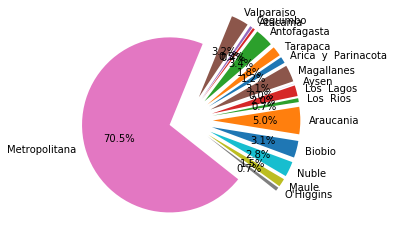

In [10]:
etiquetas = region_types[:-1]
totales = total_types[:-1]
etiquetas
totales
explode = (0.3, 0.3, 0.3, 0.3, 0.3,0.3, 0.2 , 0.3, 0.3, 0.3,0.3, 0.3, 0.3,0.3,0.3,0.3)
plt.figure()
plt.plot(figsize=(40,20))
plt.pie(totales, explode=explode, labels=etiquetas, autopct='%1.1f%%',  startangle=30);

plt.axis('equal');


## El mayor pocentaje de  contagiados a nivel nacional lo lidera la región Metrpolitana con un 70,5%. El 29,5% restante se distribuye a nivel nacional en las regiones restantes las cuales no sobrepasan el 5% cada una.  De las restante a Aracania es la con mayor porcentaje (5%).

### Comunas de Valparaíso

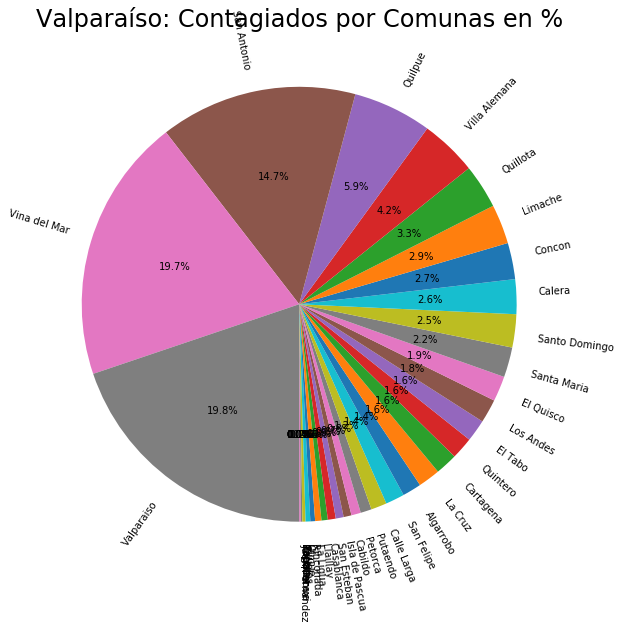

In [11]:
#Datos-COVID19/output/producto2/2020-05-08-CasosConfirmados.csv
df = pd.read_csv("Datos-COVID19/output/producto2/2020-05-08-CasosConfirmados.csv")

dfRegion=df.loc[df['Region']=='Valparaíso',['Region','Comuna','Casos Confirmados']]  
dfRegion=dfRegion.sort_values('Casos Confirmados');

explode = np.zeros(len(dfRegion['Comuna'].unique()),int)

totales = dfRegion['Casos Confirmados'].astype(int)
etiquetas = dfRegion['Comuna'].unique()
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(totales, explode=explode, labels=etiquetas, autopct='%1.1f%%',  startangle=-90,rotatelabels=True);
plt.title("Valparaíso: Contagiados por Comunas en %", fontsize = 24);

#for region in regiones:
 

### La mayoria de los casos se concentran en la principales ciudades de la Región con el 55% de lo casos para las ciudades de Valparaíso, Viña del Mar y San Antonio.

## Pregunta 3:  Mostrar el gráfico de dispersión y otro en escala semilog de la cantidad de casos confirmados de contagios totales para Chile (Valparaíso) en el tiempo.

In [113]:
#Datos-COVID19/output/producto3/CasosTotalesCumulativo.csv
df = pd.read_csv("Datos-COVID19/output/producto3/CasosTotalesCumulativo_T.csv")
#df = (pd.melt(df).rename(columns={'Region' : 'Fecha'}))
del df['Total']
df

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-05-06,318,339,855,80,97,716,15582,145,408,791,789,1362,200,541,7,818
65,2020-05-07,325,417,895,87,100,781,16828,151,414,793,814,1385,202,545,8,836
66,2020-05-08,327,459,923,88,111,828,17979,167,425,794,842,1403,203,548,8,867
67,2020-05-09,337,485,947,117,129,878,18957,182,432,801,882,1418,206,559,8,881


### Chile

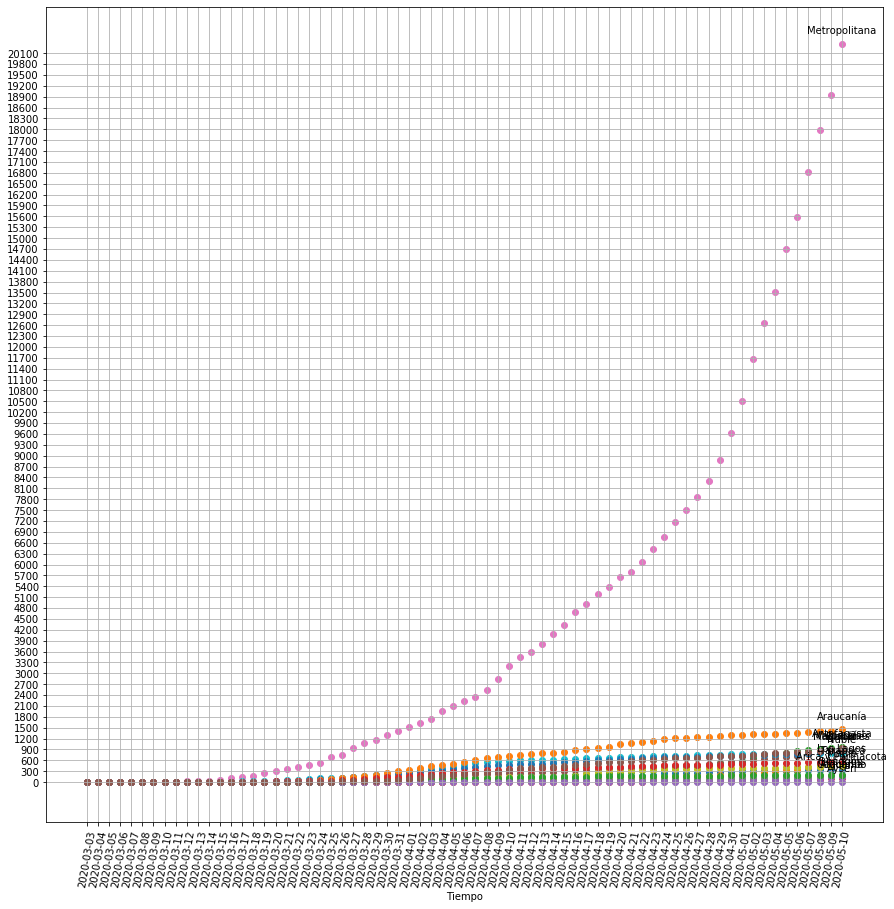

In [114]:
regiones = []
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, 20353, 300)
reg = df.columns

for r in reg:
    if(r != 'Region') :
        regiones.append(r)

fig, ax1 = plt.subplots(figsize = (15,15))
for region in regiones:
    chart=ax1.scatter(df['Region'], df[region])
    #for x,y in zip(df['Region'],df[region]):
    x1 =df['Region']
    y1 =df[region]
    x=x1[len(x1)-1]
    y=y1[len(y1)-1]
    label = region # this method is called for each point
    plt.annotate(label, # this is the text
    (x,y), # this is the point to label
    textcoords="offset points", # how to position the text
    xytext=(0,10), # distance from text to points (x,y)
    ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(regiones)),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
ax1.set_yticks(yE)
plt.grid(True)


In [115]:
# Escala logaritmica

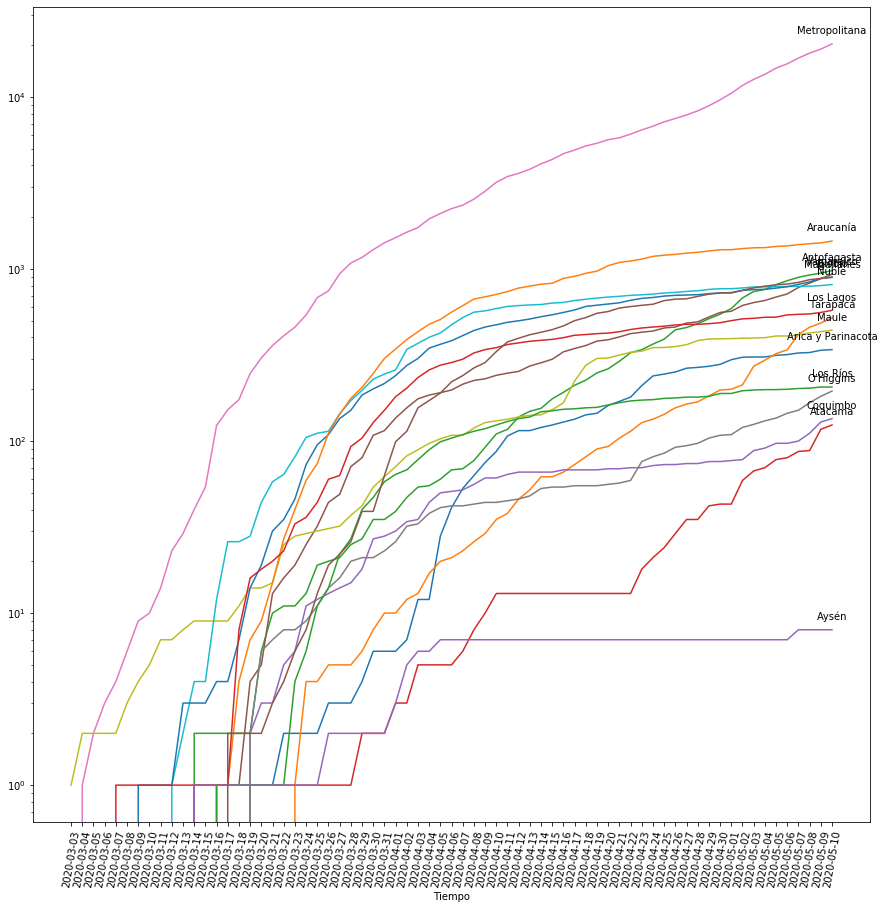

In [116]:
regiones = []
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, 20353, 300)
reg = df.columns

for r in reg:
    if(r != 'Region') :
        regiones.append(r)

fig, ax1 = plt.subplots(figsize = (15,15))
for region in regiones:
    #chart=ax1.scatter(df['Region'], df[region])
    chart=ax1.plot(df['Region'], df[region])
    #for x,y in zip(df['Region'],df[region]):
    x1 =df['Region']
    y1 =df[region]
    x=x1[len(x1)-1]
    y=y1[len(y1)-1]
    label = region # this method is called for each point
    plt.annotate(label, # this is the text
    (x,y), # this is the point to label
    textcoords="offset points", # how to position the text
    xytext=(0,10), # distance from text to points (x,y)
    ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(regiones)),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
ax1.set_yticks(yE)
plt.yscale('log')
#plt.grid(True)

### Valparaíso

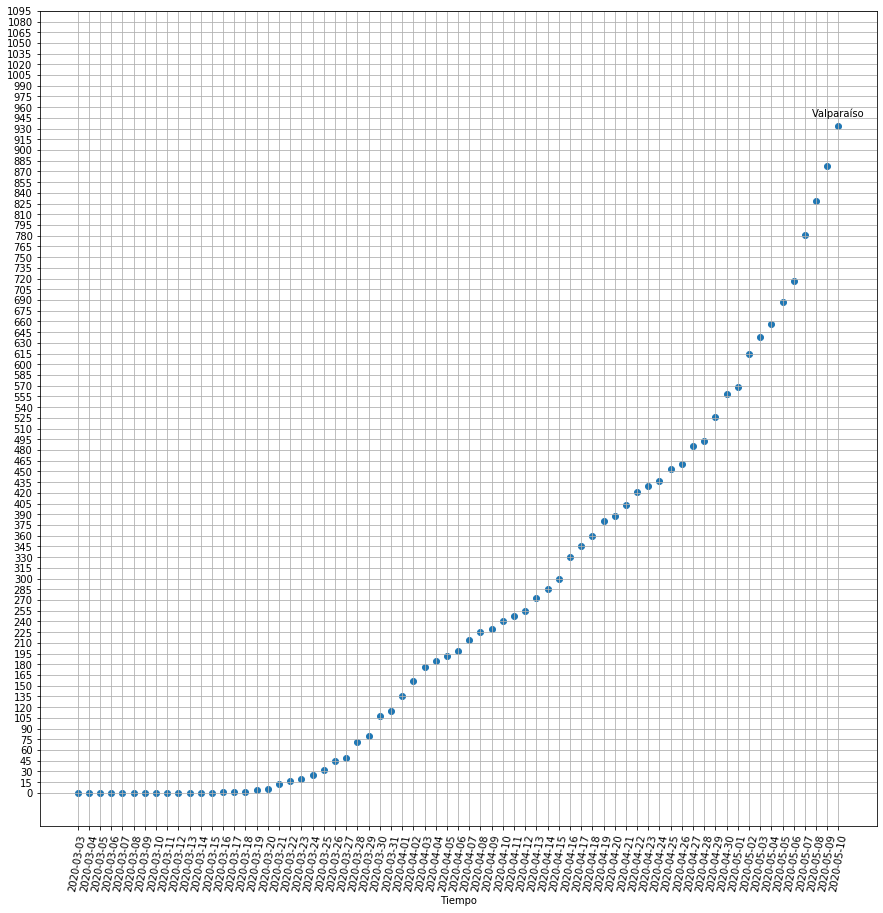

In [103]:
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, 1100, 15)

fig, ax1 = plt.subplots(figsize = (15,15))

chart=ax1.scatter(df['Region'], df['Valparaíso'])
    #for x,y in zip(df['Region'],df[region]):
x1 =df['Region']
y1 =df['Valparaíso']
x=x1[len(x1)-1]
y=y1[len(y1)-1]
label = 'Valparaíso' # this method is called for each point
plt.annotate(label, # this is the text
(x,y), # this is the point to label
textcoords="offset points", # how to position the text
xytext=(0,10), # distance from text to points (x,y)
ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(df['Region'])),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
ax1.set_yticks(yE)
#plt.yscale('log')
plt.grid(True)

In [17]:
# Escala Logaritmica

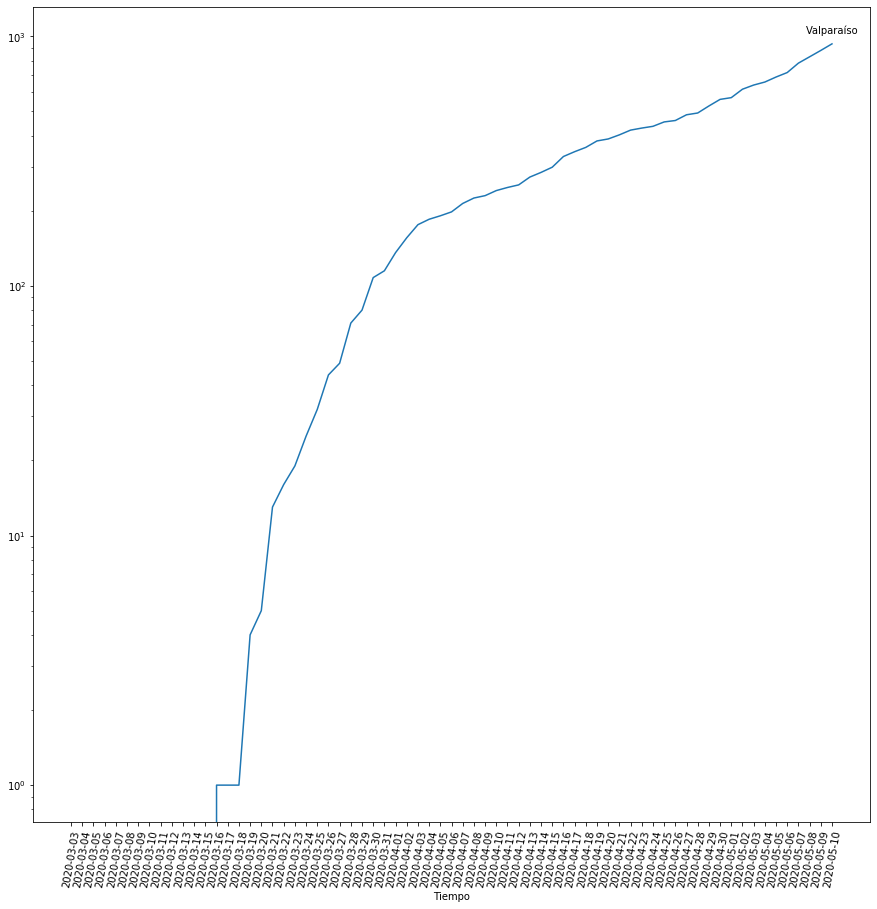

In [104]:
yE = np.arange(0, 1100, 15)

fig, ax1 = plt.subplots(figsize = (15,15))

chart=ax1.plot(df['Region'], df['Valparaíso'])
    #for x,y in zip(df['Region'],df[region]):
x1 =df['Region']
y1 =df['Valparaíso']
x=x1[len(x1)-1]
y=y1[len(y1)-1]
label = 'Valparaíso' # this method is called for each point
plt.annotate(label, # this is the text
(x,y), # this is the point to label
textcoords="offset points", # how to position the text
xytext=(0,10), # distance from text to points (x,y)
ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(df['Region'])),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
#ax1.set_yticks(yE)
plt.yscale('log')
#plt.grid(True)

### Pregunta 4: A partir de los casos de contagios totales en el tiempo, obtener la cantidad de casos diarios y realizar el gráfico de barras.

In [108]:
#Datos-COVID19/output/producto3/CasosTotalesCumulativo.csv
df = pd.read_csv("Datos-COVID19/output/producto3/CasosTotalesCumulativo.csv").tail(1)
del df['Region']
df

,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
16,1,3,4,5,7,10,15,17,23,33,...,17008,18435,19663,20643,22016,23048,24581,25972,27219,28866


In [109]:
cantidadAcum = []
cantidadPorDia = []

for col in df: #Se extrae cada cantidad acumulada y se agrega a un arreglo
    cantidadAcum.append(df[col].unique()[0])

for i in range(0,len(cantidadAcum),1):
    if(i>0): #Casos ocurridos luego del primer caso confirmado.
        cantidadPorDia.append(cantidadAcum[i]-cantidadAcum[i-1])
    else : #Primer caso a nivel nacional, no acumula.
        cantidadPorDia.append(cantidadAcum[i])
        
print(cantidadPorDia)



[1, 2, 1, 1, 2, 3, 5, 2, 6, 10, 10, 18, 14, 81, 45, 37, 104, 92, 103, 95, 114, 176, 220, 164, 304, 299, 230, 310, 289, 293, 373, 333, 424, 310, 344, 301, 430, 426, 529, 426, 286, 312, 392, 356, 534, 445, 478, 358, 419, 325, 464, 516, 494, 552, 473, 482, 552, 770, 888, 985, 1427, 1228, 980, 1373, 1032, 1533, 1391, 1247, 1647]


In [110]:
#  Se crea nuevo DataFrame con datos procesados.

newData = {
            'Fecha': df.columns,
            'Cantidad': cantidadPorDia
          }

df = pd.DataFrame(newData, columns = ['Fecha', 'Cantidad'])

print (df)
# Se crea data frame con con cantidad de casos diarios desde la detección del primer caso a nivel nacional.

         Fecha  Cantidad
0   2020-03-03         1
1   2020-03-04         2
2   2020-03-05         1
3   2020-03-06         1
4   2020-03-07         2
..         ...       ...
64  2020-05-06      1032
65  2020-05-07      1533
66  2020-05-08      1391
67  2020-05-09      1247
68  2020-05-10      1647

[69 rows x 2 columns]


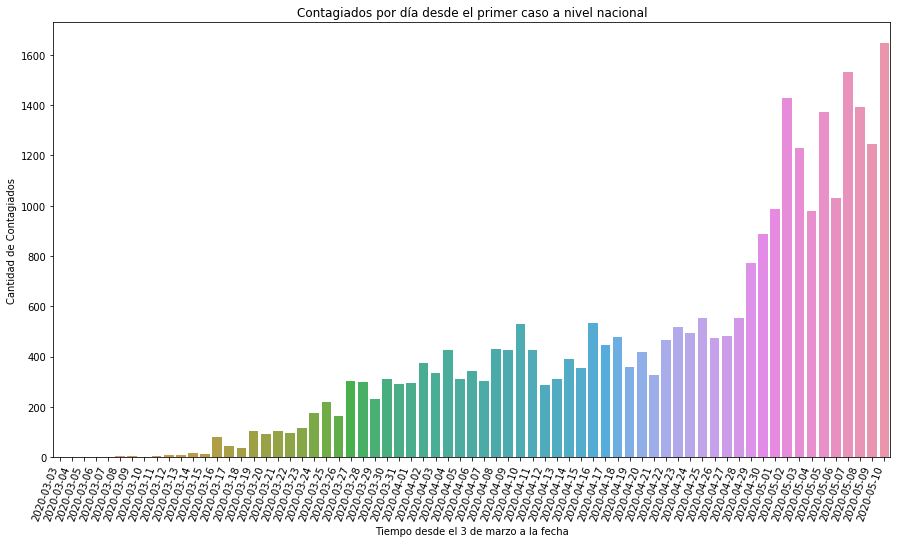

In [111]:
#Se grafica con barras
plt.figure(figsize=(15,8))
chart=sns.barplot(x='Fecha', y='Cantidad', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=70 , horizontalalignment='right');
plt.ylabel('Cantidad de Contagiados');
plt.xlabel('Tiempo desde el 3 de marzo a la fecha');
plt.title('Contagiados por día desde el primer caso a nivel nacional');

### Se puede concluir que desde los ultimos dias del mes de abril, se han reportado el doble de casos de los días anteriores, levantando la alerta en relación a un posible crecimiento exponencial y como concecuencia, a la saturación del sistema de salud para el mes de mayo. Donde se deberian adoptar medidas de confinamiento mas restrictivas para las ciudades mas afectadas.

## Pregunta 5: Mostrar el gráfico de dispersión y otro en escala semilog de la cantidad de pacientes en UCI para Chile (Valparaíso) en el tiempo.

In [239]:
#Datos-COVID19/output/producto8/UCI.csv
df = pd.read_csv("Datos-COVID19/output/producto8/UCI.csv")
del df['Codigo region']
del df['Poblacion']
del df['Region']
#df= df.tail(len(df)-2) #Se eliminan datos en relación a Código región y Población, solo se requiere fechas y cantidad.
#df.assign(Total = df['Arica y Parinacota'] + df['Tarapacá'])
df

,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
0,0,0,0,0,2,4,4,5,5,5,...,9,7,7,7,6,7,8,7,7,7
1,1,1,1,1,1,2,2,2,2,3,...,2,2,4,4,5,5,5,4,6,6
2,3,4,3,3,3,3,2,2,2,3,...,23,22,24,25,24,28,28,29,30,31
3,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2
4,1,1,1,2,1,1,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
5,14,17,18,22,27,22,21,20,22,21,...,19,18,17,18,17,16,15,18,19,18
6,83,90,107,129,146,161,160,174,164,181,...,262,269,289,303,314,340,348,366,394,415
7,5,5,5,5,5,6,6,6,6,7,...,6,5,5,5,7,5,6,6,5,5
8,3,3,3,3,4,5,7,8,10,11,...,5,5,8,8,7,4,4,4,4,4
9,7,8,10,11,10,11,13,13,13,13,...,8,8,9,9,7,7,7,7,8,8


In [240]:
sumaCamasPorDia=[]

for col in df:
    #if(col != 'Region'):
    sumaCamasPorDia.append(sum(df[col]))

newData = {
            'Fecha': df.columns,
            'Cantidad': sumaCamasPorDia
          }

df = pd.DataFrame(newData, columns = ['Fecha', 'Cantidad'])
#print(df.tail(1)['Cantidad'].unique()[0])

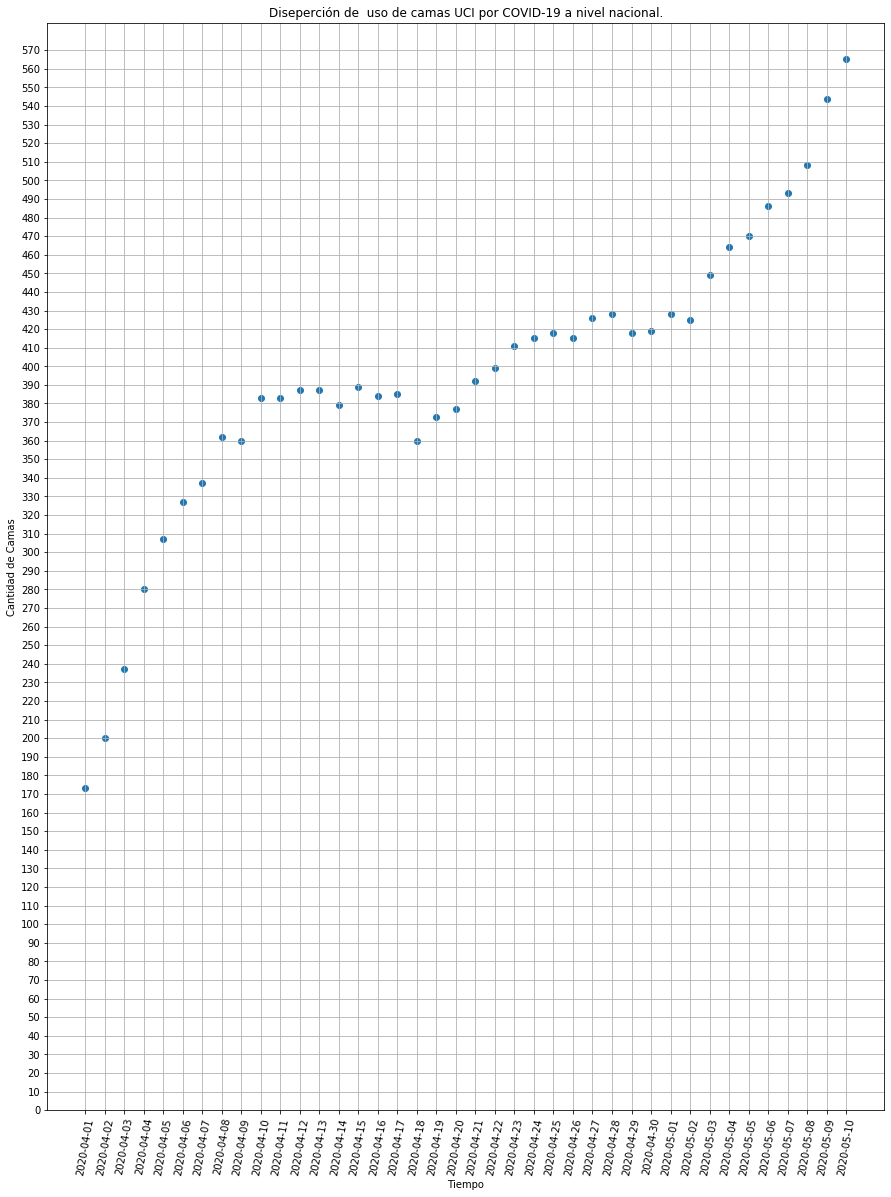

In [241]:

#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, df.tail(1)['Cantidad'].unique()[0]+10,10)
reg = df.columns

fig, ax1 = plt.subplots(figsize = (15,20))
chart=ax1.scatter(df['Fecha'], df['Cantidad'])
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(regiones)),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
plt.ylabel('Cantidad de Camas');
plt.title('Diseperción de  uso de camas UCI por COVID-19 a nivel nacional.');
ax1.set_yticks(yE)
plt.grid(True)


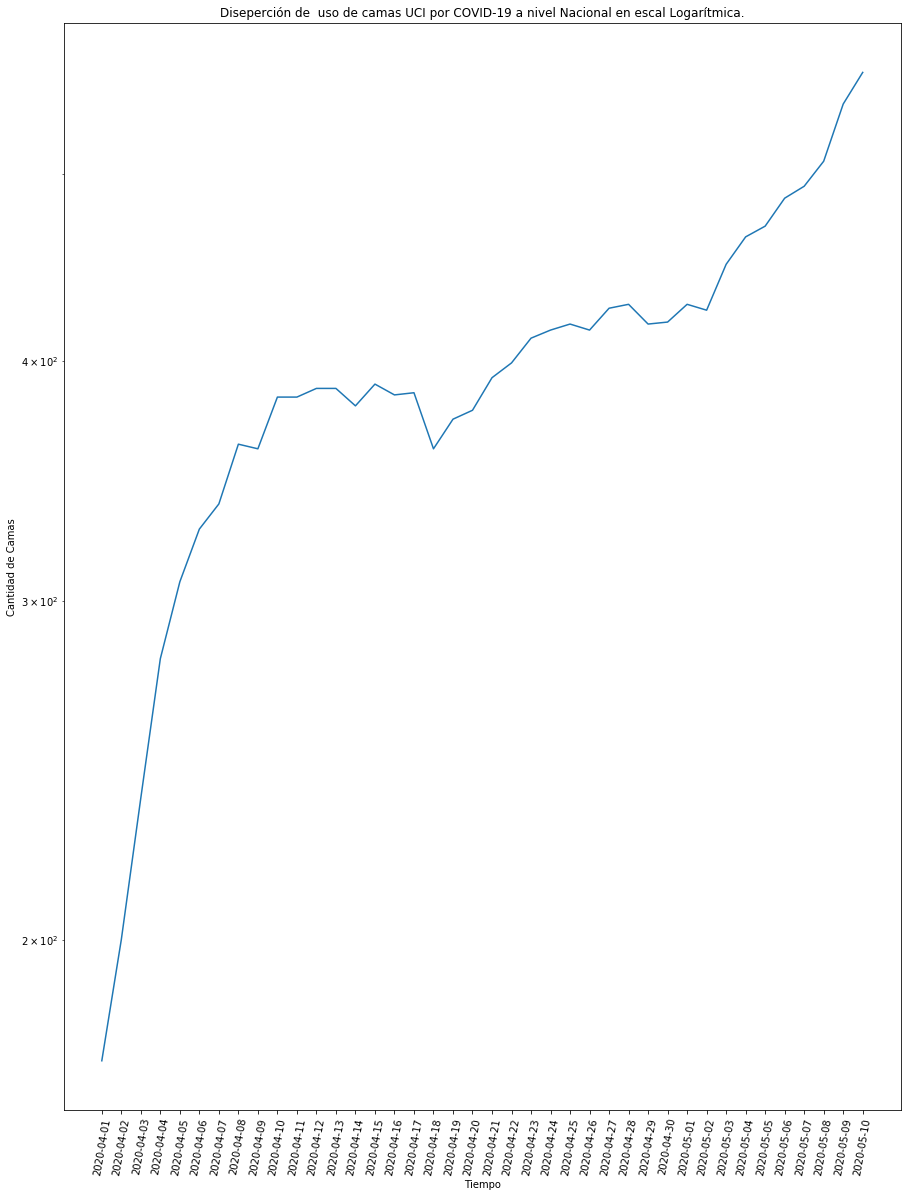

In [243]:
#for i in range(0, 20353): #(int i=0; i<20353; i+=50)
yE = np.arange(0, df.tail(1)['Cantidad'].unique()[0]+10,10)
reg = df.columns

fig, ax1 = plt.subplots(figsize = (15,20))
chart=ax1.plot(df['Fecha'], df['Cantidad'])
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(regiones)),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
plt.ylabel('Cantidad de Camas');
plt.title('Diseperción de  uso de camas UCI por COVID-19 a nivel Nacional en escal Logarítmica.');
ax1.set_yticks(yE)
plt.yscale('log')
#plt.grid(True)

## Se puede observar que en la primera semana de mayo un ajuste al crecimiento exponencial en el uso de camas UCI, luego existe una meseta probablemente probocada por el sistema de cuarentenas dinámicas implementado en un inicio, luego nuevamente la grafica se ajusta a la función exponencial de la cual a la fecha aun no se observa estancamiento o nueva meseta para el uso de camas UCI. La concentración del uso de este recurso esta en la Región metropolitana.

# Región de Valparaíso.

In [247]:
df = pd.read_csv("Datos-COVID19/output/producto8/UCI_T.csv")
df= df.tail(len(df)-2) #Se eliminan datos en relación a Código región y Población, solo se requiere fechas y cantidad.
df

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes
2,2020-04-01,0,1,3,0,1,14,83,5,3,7,14,26,1,10,0,5
3,2020-04-02,0,1,4,0,1,17,90,5,3,8,18,29,2,12,0,10
4,2020-04-03,0,1,3,0,1,18,107,5,3,10,21,37,2,18,0,11
5,2020-04-04,0,1,3,0,2,22,129,5,3,11,24,44,2,22,0,12
6,2020-04-05,2,1,3,0,1,27,146,5,4,10,26,44,3,22,0,13
7,2020-04-06,4,2,3,0,1,22,161,6,5,11,27,46,4,23,0,12
8,2020-04-07,4,2,2,0,2,21,160,6,7,13,32,46,6,24,0,12
9,2020-04-08,5,2,2,1,1,20,174,6,8,13,31,54,6,25,0,14
10,2020-04-09,5,2,2,1,1,22,164,6,10,13,33,56,7,24,0,14
11,2020-04-10,5,3,3,1,2,21,181,7,11,13,32,57,7,25,0,15


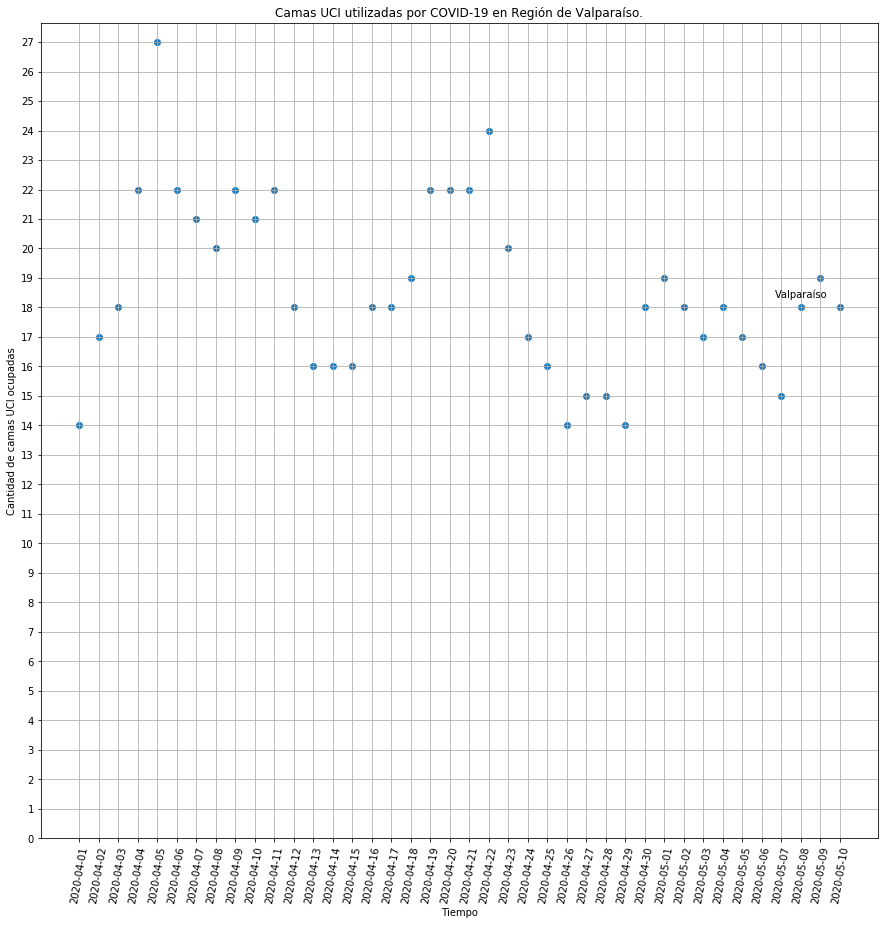

In [248]:
yE = np.arange(0, df.tail(1)['Valparaíso'].unique()[0]+10, 1)

fig, ax1 = plt.subplots(figsize = (15,15))

chart=ax1.scatter(df['Region'], df['Valparaíso']);
    #for x,y in zip(df['Region'],df[region]):
x1 =df['Region']
y1 =df['Valparaíso']
x=x1[len(x1)-1]
y=y1[len(y1)-1]
label = 'Valparaíso' # this method is called for each point
plt.annotate(label, # this is the text
(x,y), # this is the point to label
textcoords="offset points", # how to position the text
xytext=(0,10), # distance from text to points (x,y)
ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(df['Region'])),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
plt.ylabel('Cantidad de camas UCI ocupadas');
ax1.set_yticks(yE)
#plt.yscale('log');
#plt.title('Curva logarítmica de uso de camas UCI por COVID-19 en Región de Valparaíso.');
plt.title('Camas UCI utilizadas por COVID-19 en Región de Valparaíso.');
plt.grid(True)

### Se observa un uso contenido de camas UCI a nivel regional, registrando un pic la primera semana de mayo con27 recursos utilizados. A la fecha el uso se mantiene bajo las 20 camas UCI.

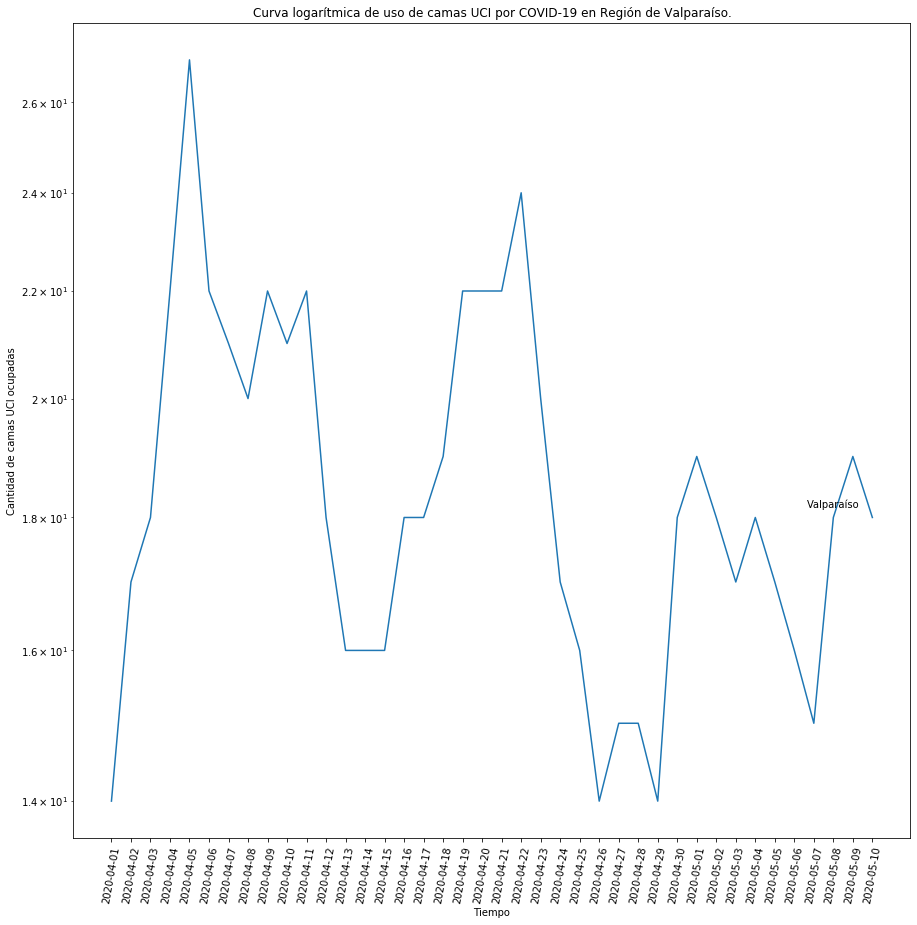

In [236]:
yE = np.arange(0, df.tail(1)['Valparaíso'].unique()[0]+10, 1)

fig, ax1 = plt.subplots(figsize = (15,15))

chart=ax1.plot(df['Region'], df['Valparaíso']);
    #for x,y in zip(df['Region'],df[region]):
x1 =df['Region']
y1 =df['Valparaíso']
x=x1[len(x1)-1]
y=y1[len(y1)-1]
label = 'Valparaíso' # this method is called for each point
plt.annotate(label, # this is the text
(x,y), # this is the point to label
textcoords="offset points", # how to position the text
xytext=(0,10), # distance from text to points (x,y)
ha='center') # horizontal alignment can be left, right or center
    
#legend1 = ax1.legend(*chart.legend_elements(num=len(df['Region'])),loc="upper left", title="Ranking")
#ax1.add_artist(legend1)
plt.xticks(rotation=80)
plt.xlabel('Tiempo');
plt.ylabel('Cantidad de camas UCI ocupadas');
ax1.set_yticks(yE)
plt.yscale('log');
plt.title('Curva logarítmica de uso de camas UCI por COVID-19 en Región de Valparaíso.');
#plt.title('Camas UCI utilizadas por COVID-19 en Región de Valparaíso.');
#plt.grid(True)

### Se puede obervar en a nivel de la Región de Valparaíso el uso de camas UCI no ha sido explotado a nivel exponecial, esto debido a que el comportamiento de la función logarítmica no se ajusta a los datos procesados. Se puede agregar que a nivel de uso de camas UCI el stock aun se encuentra bajo control y disponible.

## Respuesta 6: Realizar un gráfico box-plot de los casos nuevos de cada día de los últimos 20 días categorizado según la región.

In [265]:
#Datos-COVID19/output/producto26/CasosNuevosConSintomas.csv
df = pd.read_csv("Datos-COVID19/output/producto26/CasosNuevosConSintomas_T.csv")
del df['Total']
df=df.tail(20)
df

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes
49,2020-04-21,9,11,28,0,0,15,145,1,12,7,10,47,5,8,0,27
50,2020-04-22,10,10,35,0,1,18,295,2,12,9,22,21,4,13,0,12
51,2020-04-23,30,14,14,5,0,8,351,17,5,5,17,29,2,9,0,10
52,2020-04-24,29,6,26,3,2,7,327,5,16,7,8,42,1,6,0,9
53,2020-04-25,6,9,25,3,1,18,404,4,1,10,13,19,3,5,0,31
54,2020-04-26,7,13,52,5,0,6,331,7,4,6,7,13,1,8,0,13
55,2020-04-27,13,8,14,6,1,25,362,2,9,10,3,20,2,4,0,3
56,2020-04-28,3,5,24,0,0,8,442,3,21,6,3,15,0,0,0,22
57,2020-04-29,4,14,33,7,2,33,339,7,8,14,10,22,2,4,0,21
58,2020-04-30,2,15,27,1,0,28,650,3,0,7,6,18,7,5,0,11


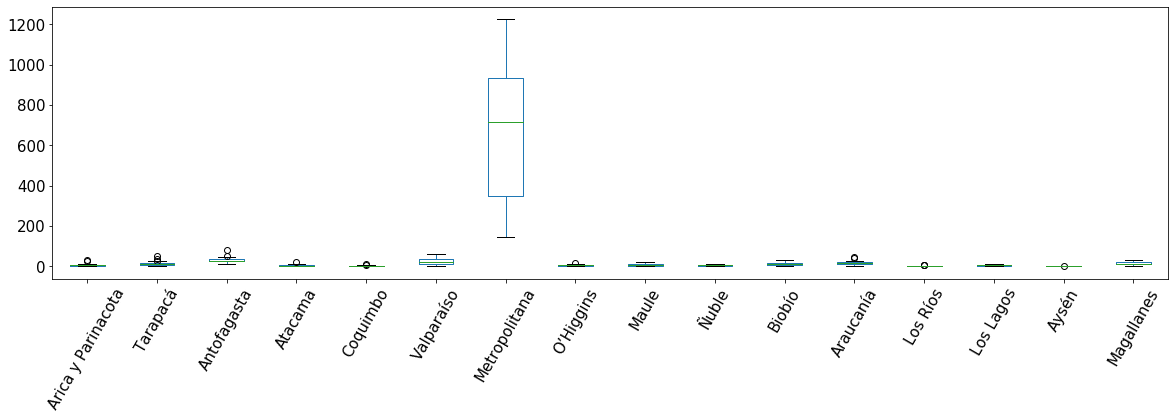

In [268]:
boxplot = df.boxplot(grid=False, rot=60, fontsize=15, figsize=(20,5) )

## Respuesta 7: Realizar un gráfico de violín para la cantidad de contagiados separados por género y rango etareo.

In [284]:
#Datos-COVID19/output/producto4/2020-05-10-CasosConfirmados-totalRegional.csv
df = pd.read_csv("Datos-COVID19/output/producto16/CasosGeneroEtario.csv")
cols = df.columns

for label in df:
    if (label != 'Grupo de edad' and label != 'Sexo' and label != cols[len(cols)-1]):
        del df[label] 

df

,Grupo de edad,Sexo,2020-05-08
0,00 - 04 años,M,277
1,05 - 09 años,M,194
2,10 - 14 años,M,247
3,15 - 19 años,M,370
4,20 - 24 años,M,1045
5,25 - 29 años,M,1747
6,30 - 34 años,M,1807
7,35 - 39 años,M,1506
8,40 - 44 años,M,1272
9,45 - 49 años,M,1177


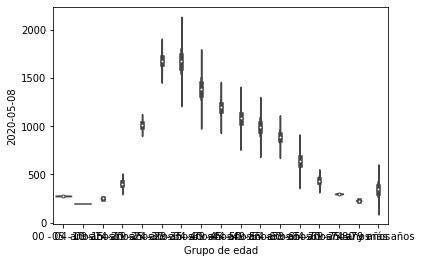

In [307]:

#chart = sns.catplot(x='Grupo de edad', y='2020-05-08', hue='Sexo', kind='violin', split=True ,data=df );
sns.violinplot(x="Grupo de edad", y="2020-05-08", data=df);

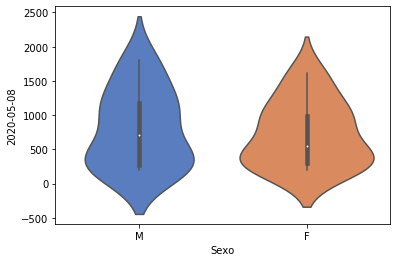

In [306]:
sns.violinplot(x="Sexo", y="2020-05-08", data=df, palette="muted");

## Realizar una tabla de datos coloreada para mostrar cantidad de casos nuevos por región vs día considerando los últimos 7 días.

In [ ]:
#pendiente